Coronavirus disease 2019 (COVID-19) time series listing confirmed cases, reported deaths, and reported recoveries. Data is disaggregated by country (and sometimes sub region). Coronavirus disease (COVID-19) is caused by Severe acute respiratory syndrome Coronavirus 2 (SARS-CoV-2) and has had a worldwide effect. On March 11, 2020, the World Health Organization (WHO) declared it a pandemic, pointing to the over 118,000 cases of the coronavirus illness in over 110 countries and territories around the world at the time.

This dataset includes data for tracking the number of people affected by COVID-19 worldwide, including:

confirmed tested cases of Coronavirus infection
the number of people who have reportedly died while sick with Coronavirus
the number of people who have reportedly recovered from it


Now find the number of deaths  as a target variable

# Data Processing

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df=pd.read_csv("coronavirus.csv")
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [65]:
df.tail()

,Date,Country,Confirmed,Recovered,Deaths
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7
23687,2020-05-26,Zimbabwe,56,25,4


In [66]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

# Exploring data

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [68]:
print(df.isnull().sum())


Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64


In [69]:
df.shape

(23688, 5)

In [70]:
df.describe(include="all")

,Date,Country,Confirmed,Recovered,Deaths
count,23688,23688,2.368800e+04,23688.000000,23688.000000
unique,126,188,NaN,NaN,NaN
top,2020-04-29,Latvia,NaN,NaN,NaN
freq,188,126,NaN,NaN,NaN
mean,NaN,NaN,7.969368e+03,2581.801714,526.935030
std,NaN,NaN,5.842109e+04,15143.101257,3992.815956
min,NaN,NaN,0.000000e+00,0.000000,0.000000
25%,NaN,NaN,0.000000e+00,0.000000,0.000000
50%,NaN,NaN,1.800000e+01,1.000000,0.000000
75%,NaN,NaN,7.300000e+02,123.000000,13.000000


In [71]:
#total 23688 coulmns and no null values
#differnce between mean and median is high so high skewmness is present
#data is recorded from total 188 countries at 126 unique dates

# EDA

In [72]:
#date

In [73]:
df["Date"].value_counts()

2020-04-29    188
2020-02-18    188
2020-05-26    188
2020-02-29    188
2020-03-12    188
             ... 
2020-02-23    188
2020-05-03    188
2020-04-21    188
2020-03-16    188
2020-03-04    188
Name: Date, Length: 126, dtype: int64

As we can see the Date column is a categorical column, so lets change it to Datetime

In [74]:

df['Date'] = pd.to_datetime(df['Date'])

In [75]:
# Changed the Date column from object type to datetime
df['Date']

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
23683   2020-05-26
23684   2020-05-26
23685   2020-05-26
23686   2020-05-26
23687   2020-05-26
Name: Date, Length: 23688, dtype: datetime64[ns]

In [76]:
# Let's get the insight of the data
# So I am going to group total Confirmed, Recovered and Death Cases as we move down the date

df1 = df.groupby(['Date']).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [77]:
df1

,Confirmed,Recovered,Deaths
Date,,,
2020-01-22,555,28,17
2020-01-23,654,30,18
2020-01-24,941,36,26
2020-01-25,1434,39,42
2020-01-26,2118,52,56
...,...,...,...
2020-05-22,5210817,2056643,338160
2020-05-23,5310362,2112185,342097
2020-05-24,5407613,2168563,345059


In [78]:
print("The total number of Covid cases accross the world is ", df1['Confirmed'].iloc[-1])
print("The total number of Recovered cases accross the world is ", df1['Recovered'].iloc[-1])
print("The total number of Death cases accross the world is ", df1['Deaths'].iloc[-1])
print("The total number of Active cases accross the world is ", (df1['Confirmed'].iloc[-1]-df['Recovered'].iloc[-1]-df['Deaths'].iloc[-1]))
print("The total number of closed cases accross the world is ", (df1['Recovered'].iloc[-1]+df['Deaths'].iloc[-1]))

The total number of Covid cases accross the world is  5589626
The total number of Recovered cases accross the world is  2286956
The total number of Death cases accross the world is  350453
The total number of Active cases accross the world is  5589597
The total number of closed cases accross the world is  2286960


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125]),
 [Text(0, 0, '2020-01-22'),
  Text(1, 0, '2020-01-23'),
  Text(2, 0, '2020-01-24'),
  Text(3, 0, '2020-01-25'),
  Text(4, 0, '2020-01-26'),
  Text(5, 0, '2020-01-27'),
  Text(6, 0, '2020-01-28'),
  Text(7, 0, '2020-01-29'),
  Text(8, 0, '2020-01-30'),
  Text(9, 0, '2020-01-31'),
  Text(1

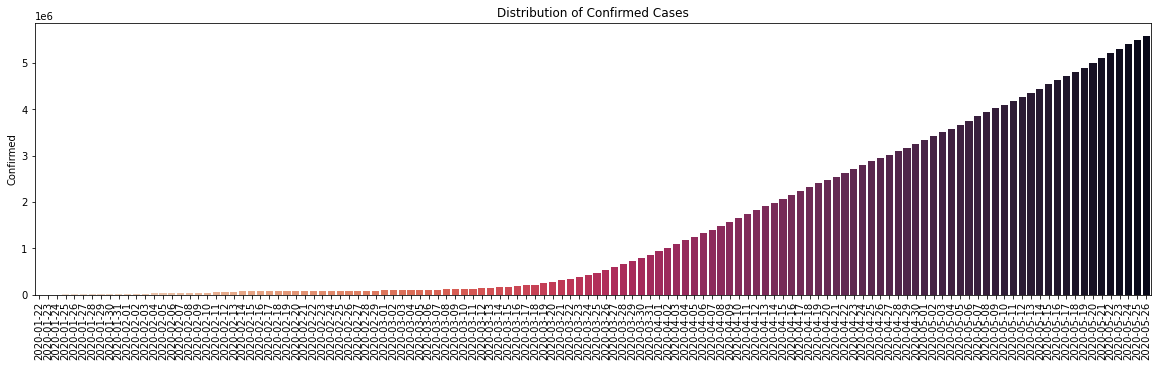

In [79]:
plt.figure(figsize=(20,5))
sns.barplot(x=df1.index.date,y=df1['Confirmed'],palette='rocket_r')
plt.title("Distribution of Confirmed Cases")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125]),
 [Text(0, 0, '2020-01-22'),
  Text(1, 0, '2020-01-23'),
  Text(2, 0, '2020-01-24'),
  Text(3, 0, '2020-01-25'),
  Text(4, 0, '2020-01-26'),
  Text(5, 0, '2020-01-27'),
  Text(6, 0, '2020-01-28'),
  Text(7, 0, '2020-01-29'),
  Text(8, 0, '2020-01-30'),
  Text(9, 0, '2020-01-31'),
  Text(1

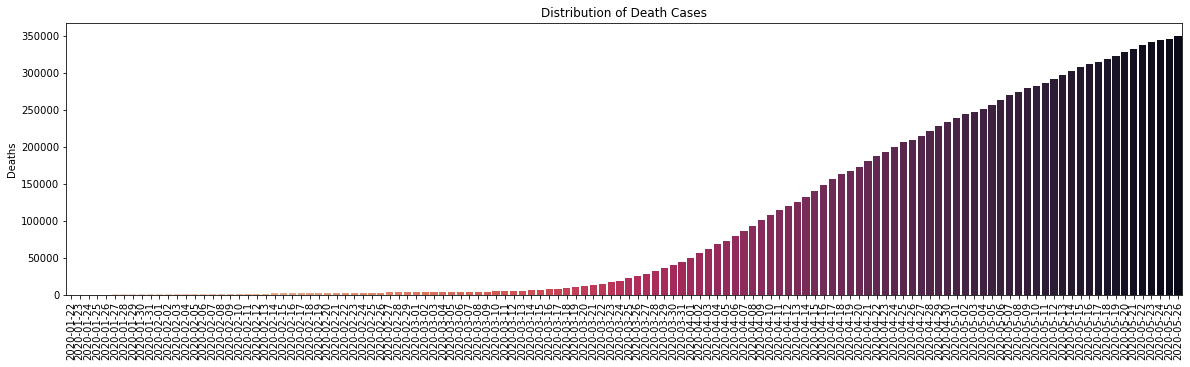

In [80]:
# Plotting total Death cases around the world
plt.figure(figsize=(20,5))
sns.barplot(x=df1.index.date,y=df1['Deaths'],palette='rocket_r')
plt.title("Distribution of Death Cases")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125]),
 [Text(0, 0, '2020-01-22'),
  Text(1, 0, '2020-01-23'),
  Text(2, 0, '2020-01-24'),
  Text(3, 0, '2020-01-25'),
  Text(4, 0, '2020-01-26'),
  Text(5, 0, '2020-01-27'),
  Text(6, 0, '2020-01-28'),
  Text(7, 0, '2020-01-29'),
  Text(8, 0, '2020-01-30'),
  Text(9, 0, '2020-01-31'),
  Text(1

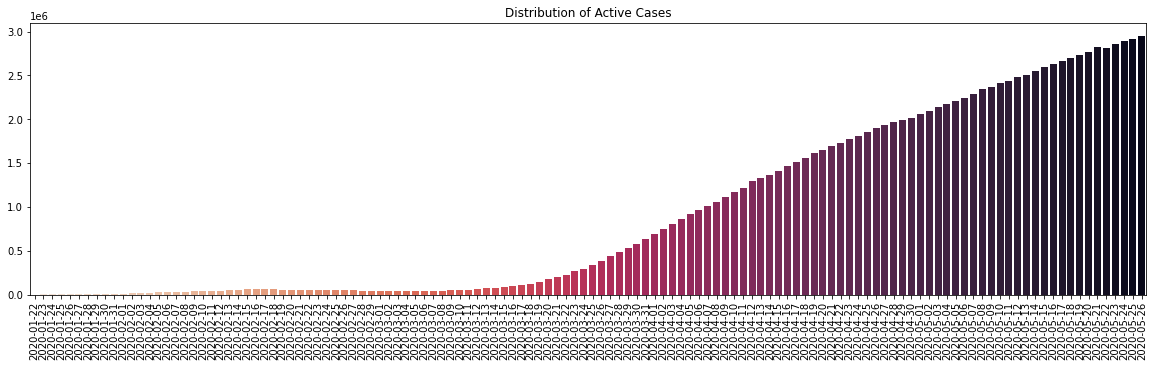

In [81]:
# Plotting total Active cases around the world
plt.figure(figsize=(20,5))
sns.barplot(x=df1.index.date,y=df1['Confirmed']-df1['Recovered']-df1['Deaths'],palette='rocket_r')
plt.title("Distribution of Active Cases")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125]),
 [Text(0, 0, '2020-01-22'),
  Text(1, 0, '2020-01-23'),
  Text(2, 0, '2020-01-24'),
  Text(3, 0, '2020-01-25'),
  Text(4, 0, '2020-01-26'),
  Text(5, 0, '2020-01-27'),
  Text(6, 0, '2020-01-28'),
  Text(7, 0, '2020-01-29'),
  Text(8, 0, '2020-01-30'),
  Text(9, 0, '2020-01-31'),
  Text(1

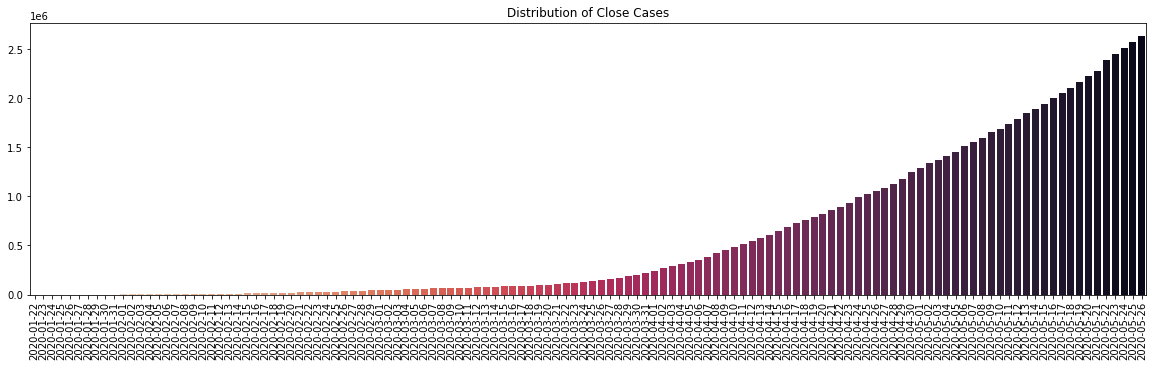

In [82]:
# Plotting the death cases around the world
plt.figure(figsize=(20,5))
sns.barplot(x=df1.index.date,y=df1['Recovered']+df1['Deaths'],palette='rocket_r')
plt.title("Distribution of Close Cases")
plt.xticks(rotation=90)

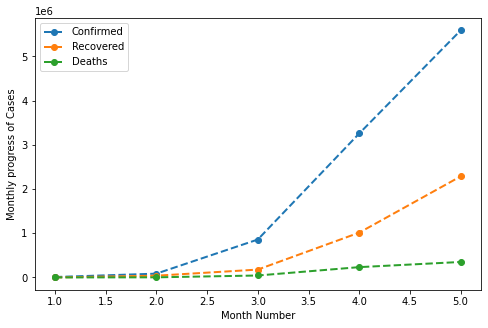

In [83]:
df1['Month_of_year'] = df1.index.month
month_num = []
month_wise_confirmed = []
month_wise_recovered = []
month_wise_deaths = []
M=1
for i in list(df1['Month_of_year'].unique()):
    month_wise_confirmed.append(df1[df1['Month_of_year']==i]['Confirmed'].iloc[-1])
    month_wise_recovered.append(df1[df1['Month_of_year']==i]['Recovered'].iloc[-1])    
    month_wise_deaths.append(df1[df1['Month_of_year']==i]['Deaths'].iloc[-1])
    month_num.append(M)
    M = M+1
plt.figure(figsize=(8,5))
plt.plot(month_num,month_wise_confirmed,linestyle='dashed',marker='o',linewidth=2,label='Confirmed')
plt.plot(month_num,month_wise_recovered,linestyle='dashed',marker='o',linewidth=2,label='Recovered')
plt.plot(month_num,month_wise_deaths,linestyle='dashed',marker='o',linewidth=2,label='Deaths')
plt.xlabel("Month Number")
plt.ylabel("Monthly progress of Cases")
plt.legend()
plt.show()

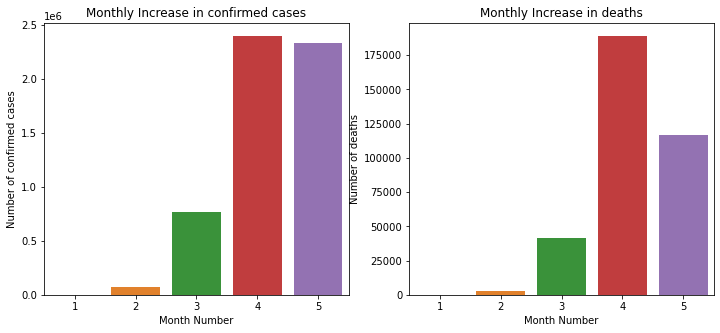

In [84]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.barplot(x=month_num,y=pd.Series(month_wise_confirmed).diff(),ax=ax1)
sns.barplot(x=month_num,y=pd.Series(month_wise_deaths).diff(),ax=ax2)
ax1.set_xlabel("Month Number")
ax2.set_xlabel("Month Number")
ax1.set_ylabel("Number of confirmed cases")
ax2.set_ylabel("Number of deaths")
ax1.set_title("Monthly Increase in confirmed cases")
ax2.set_title("Monthly Increase in deaths")
plt.show()

In [85]:
# Basic Information
print("Average increase in number of Confirmed cases everyday:",np.round(df1["Confirmed"].diff().mean()))
print("Average increase in number of Recovered cases everyday:",np.round(df1["Recovered"].diff().mean()))
print("Average increase in number of Death cases everyday:",np.round(df1["Deaths"].diff().mean()))

Average increase in number of Confirmed cases everyday: 44713.0
Average increase in number of Recovered cases everyday: 18295.0
Average increase in number of Death cases everyday: 2803.0


Text(0.5, 1.0, 'Top 10 countries as per number of death cases')

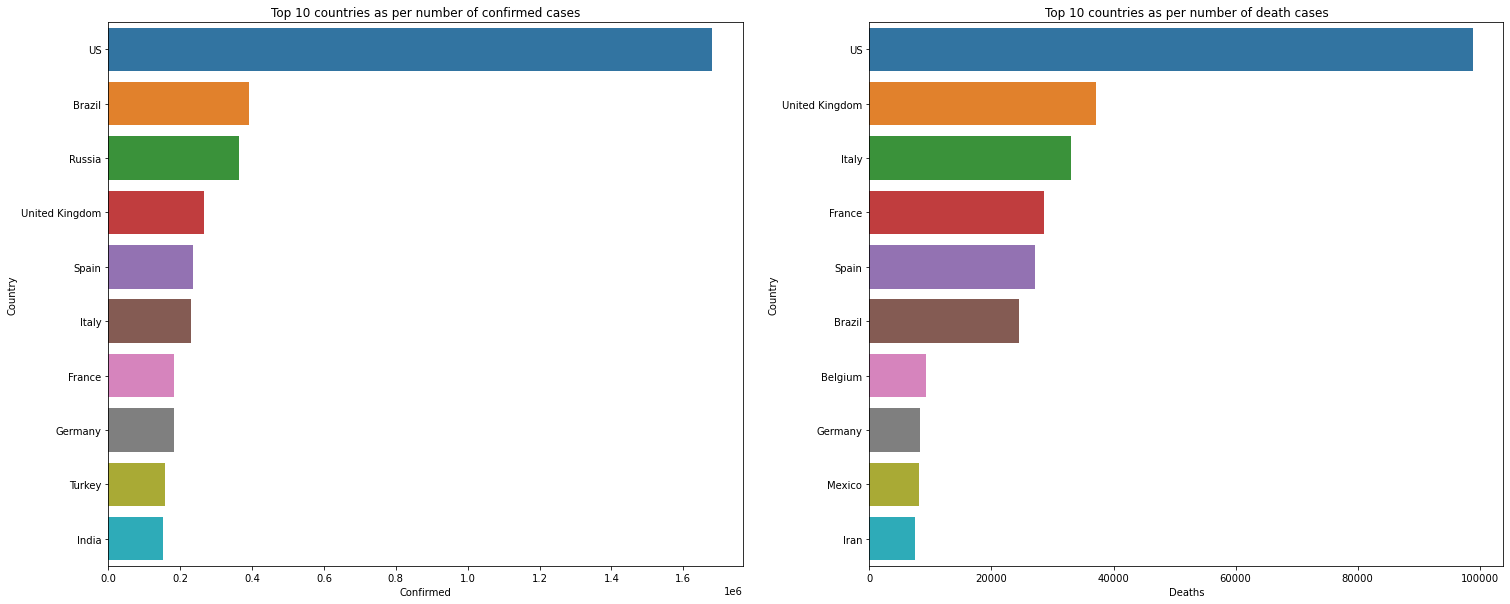

In [86]:
# Top 10 countries with maximum cases of covid and maximum deaths due to covid

asc= df[df["Date"]==df["Date"].max()].groupby(["Country"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)
top_10confirmed = asc.sort_values(["Confirmed"],ascending=False).head(10)
top_10deaths = asc.sort_values(["Deaths"],ascending=False).head(10)
top_10recover = top_15recover = asc.sort_values(["Recovered"],ascending=False).head(10)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
sns.barplot(x=top_10confirmed["Confirmed"],y=top_10confirmed.index,ax=ax1)
ax1.set_title("Top 10 countries as per number of confirmed cases")
sns.barplot(x=top_10deaths["Deaths"],y=top_10deaths.index,ax=ax2)
ax2.set_title("Top 10 countries as per number of death cases")

Text(0.5, 1.0, 'Top 10 countries as per number of recovered cases')

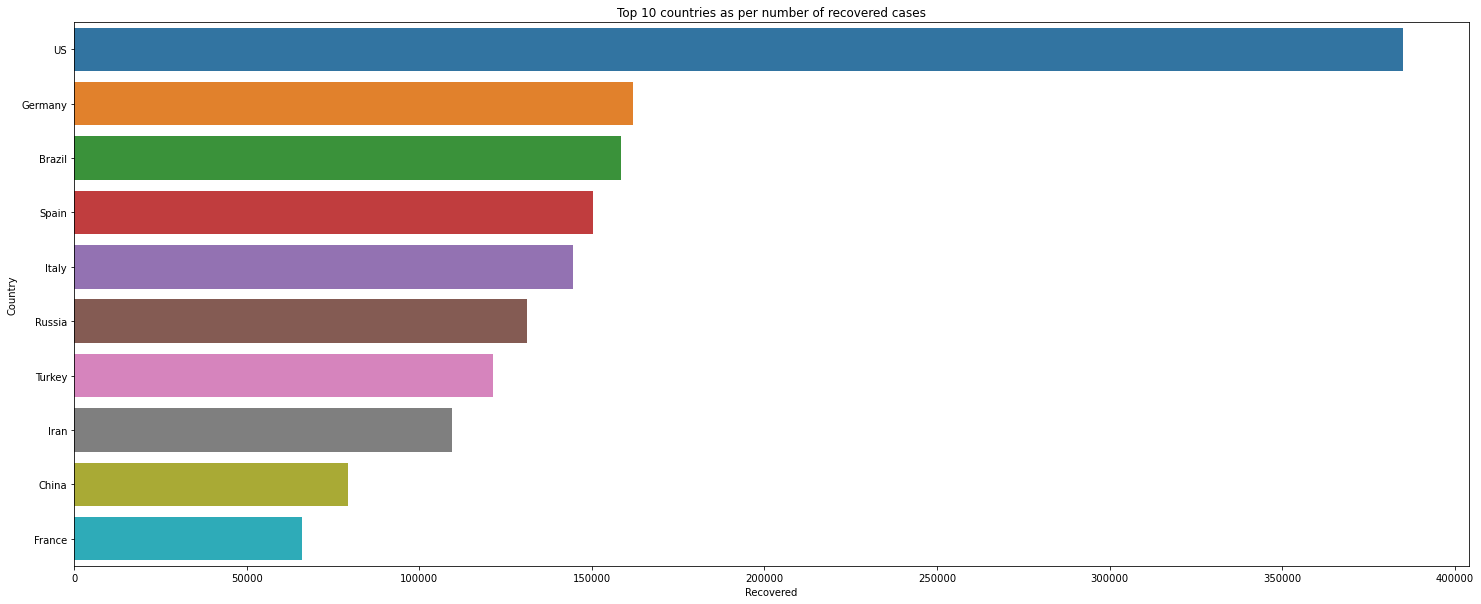

In [87]:
# Top 10 countries with as per number of recovered cases

fig,(ax3)=plt.subplots(1,figsize=(25,10))
sns.barplot(x=top_10recover["Recovered"],y=top_10recover.index,ax=ax3)
ax3.set_title("Top 10 countries as per number of recovered cases")

In [88]:
#Analysis of India

In [89]:

df_india = df[df['Country'] == 'India']
print(df_india.head())


          Date Country  Confirmed  Recovered  Deaths
79  2020-01-22   India          0          0       0
267 2020-01-23   India          0          0       0
455 2020-01-24   India          0          0       0
643 2020-01-25   India          0          0       0
831 2020-01-26   India          0          0       0


In [90]:
df3 = df_india.groupby(['Date']).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
df3.head()

,Confirmed,Recovered,Deaths
Date,,,
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,0,0,0
2020-01-25,0,0,0
2020-01-26,0,0,0


In [91]:
print("The total number of Covid cases accross India is ", df3['Confirmed'].iloc[-1])
print("The total number of Recovered cases accross India is ", df3['Recovered'].iloc[-1])
print("The total number of Death cases accross India is ", df3['Deaths'].iloc[-1])
print("The total number of Active cases accross india is ", (df3['Confirmed'].iloc[-1]-df3['Recovered'].iloc[-1]-df3['Deaths'].iloc[-1]))
print("The total number of closed cases accross India is ", (df3['Recovered'].iloc[-1]+df3['Deaths'].iloc[-1]))

The total number of Covid cases accross India is  150793
The total number of Recovered cases accross India is  64277
The total number of Death cases accross India is  4344
The total number of Active cases accross india is  82172
The total number of closed cases accross India is  68621


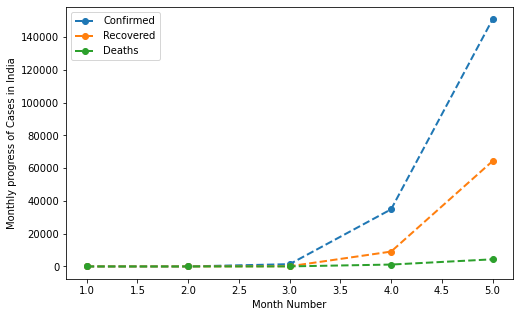

In [92]:
df3['Month_of_year'] = df3.index.month
Month_num = []
Month_wise_confirmed = []
Month_wise_recovered = []
Month_wise_deaths = []
n=1
for i in list(df3['Month_of_year'].unique()):
    Month_wise_confirmed.append(df3[df3['Month_of_year']==i]['Confirmed'].iloc[-1])
    Month_wise_recovered.append(df3[df3['Month_of_year']==i]['Recovered'].iloc[-1])    
    Month_wise_deaths.append(df3[df3['Month_of_year']==i]['Deaths'].iloc[-1])
    Month_num.append(n)
    n = n+1
plt.figure(figsize=(8,5))
plt.plot(Month_num,Month_wise_confirmed,linestyle='dashed',marker='o',linewidth=2,label='Confirmed')
plt.plot(Month_num,Month_wise_recovered,linestyle='dashed',marker='o',linewidth=2,label='Recovered')
plt.plot(Month_num,Month_wise_deaths,linestyle='dashed',marker='o',linewidth=2,label='Deaths')
plt.xlabel("Month Number")
plt.ylabel("Monthly progress of Cases in India")
plt.legend()
plt.show()

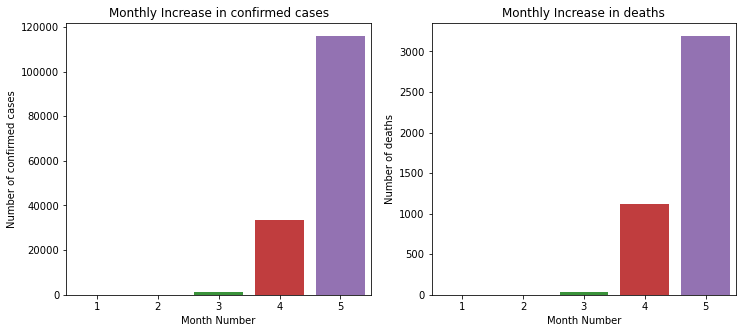

In [93]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.barplot(x=Month_num,y=pd.Series(Month_wise_confirmed).diff(),ax=ax1)
sns.barplot(x=Month_num,y=pd.Series(Month_wise_deaths).diff(),ax=ax2)
ax1.set_xlabel("Month Number")
ax2.set_xlabel("Month Number")
ax1.set_ylabel("Number of confirmed cases")
ax2.set_ylabel("Number of deaths")
ax1.set_title("Monthly Increase in confirmed cases")
ax2.set_title("Monthly Increase in deaths")
plt.show()

# DATA cleaning and transformation

In [94]:

# Extracting year, Month, Week from the Date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week
df.head()

<ipython-input-94-9c7d8f753420>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['Date'].dt.week


,Date,Country,Confirmed,Recovered,Deaths,Year,Month,Week
0,2020-01-22,Afghanistan,0,0,0,2020,1,4
1,2020-01-22,Albania,0,0,0,2020,1,4
2,2020-01-22,Algeria,0,0,0,2020,1,4
3,2020-01-22,Andorra,0,0,0,2020,1,4
4,2020-01-22,Angola,0,0,0,2020,1,4


In [95]:
# Dropping the date column as we have extracted the Year, month, week in seperate columns respectively
df.drop('Date',axis=1,inplace=True)
df.head()

,Country,Confirmed,Recovered,Deaths,Year,Month,Week
0,Afghanistan,0,0,0,2020,1,4
1,Albania,0,0,0,2020,1,4
2,Algeria,0,0,0,2020,1,4
3,Andorra,0,0,0,2020,1,4
4,Angola,0,0,0,2020,1,4


In [121]:
#Creating some new variables
df["Actiive cases"]=df["Confirmed"]-df["Recovered"]


df["recovery rate"]=(df["Recovered"]/df["Confirmed"])*100

df[" Avg Number of active cases each month all over the world"]=df["Actiive cases"].groupby(df["Month"]).transform("mean")
df[" Avg Number of Recovered cases each month all over the world"]=df["Recovered"].groupby(df["Month"]).transform("mean")
df[" Avg Number of Confirmed cases each month all over the world"]=df["Confirmed"].groupby(df["Month"]).transform("mean")

df[" Avg Number of active cases each Country"]=df["Actiive cases"].groupby(df["Country"]).transform("mean")
df[" Avg Number of Recovered cases each Country"]=df["Recovered"].groupby(df["Country"]).transform("mean")
df[" Avg Number of Confirmed cases each Country"]=df["Confirmed"].groupby(df["Country"]).transform("mean")

In [138]:
ACR=df.groupby(["Month","Country"])["Confirmed","Recovered"].mean().reset_index().rename(columns={"Confirmed": "Confirmed per country per month","Recovered": "Recovered per country per month" })
ACR["Increase / Decrease in confirmed cases"]=ACR["Confirmed per country per month"].diff(periods=1)
ACR["Increase / Decrease in Recovered"]=ACR["Recovered per country per month"].diff(periods=1)
df=pd.merge(df,ACR, how="inner", on=["Month","Country"])

<ipython-input-138-9ad27698f01d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ACR=df.groupby(["Month","Country"])["Confirmed","Recovered"].mean().reset_index().rename(columns={"Confirmed": "Confirmed per country per month","Recovered": "Recovered per country per month" })


In [139]:
df

,Country,Confirmed,Recovered,Deaths,Year,Month,Week,Actiive cases,recovery rate,Avg Number of active cases each month,...,Confirmed per country per month_x,Recovered per country per month_x,Confirmed per country per month_y,Recovered per country per month_y,Increase / Decrease in confirmed cases_x,Increase / Decrease in Recovered_x,Confirmed per country per month,Recovered per country per month,Increase / Decrease in confirmed cases_y,Increase / Decrease in Recovered_y
0,Afghanistan,0,0,0,2020,1,4,0,NaN,20.047872,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN,NaN
1,Afghanistan,0,0,0,2020,1,4,0,NaN,20.047872,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN,NaN
2,Afghanistan,0,0,0,2020,1,4,0,NaN,20.047872,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN,NaN
3,Afghanistan,0,0,0,2020,1,4,0,NaN,20.047872,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN,NaN
4,Afghanistan,0,0,0,2020,1,4,0,NaN,20.047872,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,Zimbabwe,51,18,4,2020,5,21,33,35.294118,15011.016571,...,41.884615,12.730769,41.884615,12.730769,NaN,NaN,41.884615,12.730769,-471.076923,-159.615385
23684,Zimbabwe,56,18,4,2020,5,21,38,32.142857,15011.016571,...,41.884615,12.730769,41.884615,12.730769,NaN,NaN,41.884615,12.730769,-471.076923,-159.615385
23685,Zimbabwe,56,25,4,2020,5,21,31,44.642857,15011.016571,...,41.884615,12.730769,41.884615,12.730769,NaN,NaN,41.884615,12.730769,-471.076923,-159.615385
23686,Zimbabwe,56,25,4,2020,5,22,31,44.642857,15011.016571,...,41.884615,12.730769,41.884615,12.730769,NaN,NaN,41.884615,12.730769,-471.076923,-159.615385


In [140]:
df=pd.get_dummies(df, prefix=["Country"], prefix_sep='_', dummy_na=False, columns=["Country"], sparse=False, drop_first=True, dtype=None)

In [141]:
df

,Confirmed,Recovered,Deaths,Year,Month,Week,Actiive cases,recovery rate,Avg Number of active cases each month,Avg Number of Recovered cases each month,...,Country_United Kingdom,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_West Bank and Gaza,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,0,0,0,2020,1,4,0,NaN,20.047872,0.448936,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,2020,1,4,0,NaN,20.047872,0.448936,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,2020,1,4,0,NaN,20.047872,0.448936,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2020,1,4,0,NaN,20.047872,0.448936,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,2020,1,4,0,NaN,20.047872,0.448936,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,51,18,4,2020,5,21,33,35.294118,15011.016571,8540.835106,...,0,0,0,0,0,0,0,0,0,1
23684,56,18,4,2020,5,21,38,32.142857,15011.016571,8540.835106,...,0,0,0,0,0,0,0,0,0,1
23685,56,25,4,2020,5,21,31,44.642857,15011.016571,8540.835106,...,0,0,0,0,0,0,0,0,0,1
23686,56,25,4,2020,5,22,31,44.642857,15011.016571,8540.835106,...,0,0,0,0,0,0,0,0,0,1


In [165]:
df=df.fillna(0)

In [167]:
df.shape

(23688, 212)

In [168]:
# Features and Target variable
x = df.drop('Deaths',axis=1)
y = df['Deaths']

In [169]:
#scaling the values
from sklearn.preprocessing import MinMaxScaler
sl=MinMaxScaler()
x=pd.DataFrame(sl.fit_transform(x))
x

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,0.000030,0.000047,0.0,1.0,0.944444,0.000025,0.352941,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23684,0.000033,0.000047,0.0,1.0,0.944444,0.000029,0.321429,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23685,0.000033,0.000065,0.0,1.0,0.944444,0.000024,0.446429,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23686,0.000033,0.000065,0.0,1.0,1.000000,0.000024,0.446429,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [170]:
x.columns[x.isnull().sum()>0]

Int64Index([], dtype='int64')

# Model fitting

In [171]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Optimizer
from sklearn.model_selection import GridSearchCV,cross_val_score

#Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,average_precision_score
from sklearn.metrics import adjusted_mutual_info_score,balanced_accuracy_score,roc_curve,auc
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [172]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for i in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
        md=model()
        md.fit(X_train,y_train)
        predict=md.predict(X_test)
        r2score=r2_score(y_test,predict)
        if r2score>max_score:
            max_score=r2score
            max_state=i
    print("Max score is {} with random state {}".format(max_score,max_state))

In [173]:
model_select(KNeighborsRegressor)

Max score is 0.9985159396925863 with random state 96


In [174]:
model_select(DecisionTreeRegressor)

Max score is 0.9989504004646218 with random state 57


In [175]:
model_select(Ridge)

Max score is 0.9457617502718866 with random state 81


In [176]:
model_select(ElasticNet)

Max score is 0.11568721221550937 with random state 87


In [177]:
model_select(Lasso)

Max score is 0.9459904968549715 with random state 81


In [179]:
model_select(LinearRegression)

Max score is 0.9451870273849007 with random state 81


In [182]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=97)

In [183]:
cross_val_score(DecisionTreeRegressor(),X_train,y_train,cv=5).mean()

0.9955993574720265

In [184]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
print(dt.score(X_train, y_train))

0.999999993517337


In [185]:
predict=dt.predict(X_test)

predict=pd.DataFrame((predict))
predict


,0
0,80.0
1,0.0
2,6.0
3,2.0
4,0.0
...,...
7102,2.5
7103,0.0
7104,0.0
7105,3019.0


In [186]:
print("R2 score is "+str(r2_score(y_test,predict)))
print("Mean absolute error is "+str(mean_absolute_error(y_test,predict)))
print("Mean squared error is "+str(mean_squared_error(y_test,predict)))

R2 score is 0.9963885996930523
Mean absolute error is 27.14418882791614
Mean squared error is 62632.0296685193


Text(0, 0.5, 'Predicted Y')

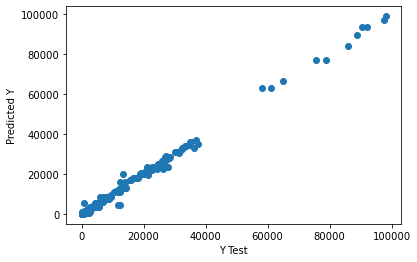

In [188]:
# Plotting the actual y and predicted y
plt.scatter(x=y_test,y=predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [189]:
result=pd.DataFrame(y_test)
result

,Deaths
8354,101
1500,0
16671,2
9430,1
3566,0
...,...
15388,2
7250,0
5749,0
13648,2523


In [190]:
import pickle

In [191]:
filename="CovidDeaths.pkl"
pickle.dump(dt,open(filename,"wb"))